In [10]:
import torch
import torch.nn as nn
import torch.functional as F
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [15]:
df = pd.read_csv("/run/media/nuclea/Code/DataScience/PracticeNotebooks/titanic/titanic/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
def data_processing(df:pd.DataFrame):
    # droping unnecesary cols
    df = df.drop(['Name', 'Ticket'], axis=1)
    # converting sex to int
    for i,sex in enumerate(df['Sex']):
        if sex == 'male' or sex == 1:
            df.loc[i, 'Sex'] = 1
        else:
            df.loc[i, 'Sex'] = 2
    df['Sex'] = df['Sex'].astype(int)
    # converting other objects to int
    le = LabelEncoder()
    df['Cabin_int'] = le.fit_transform(df['Cabin'])
    df['Embarked_int'] = le.fit_transform(df['Embarked'])
    df = df.drop(['Cabin'], axis=1)
    df = df.drop(['Embarked'], axis=1)
    df['Age'] = df['Age'].fillna(df['Age'].mean()) 
    return df

In [17]:
df = data_processing(df)

In [18]:
df.isna().sum()

PassengerId     0
Survived        0
Pclass          0
Sex             0
Age             0
SibSp           0
Parch           0
Fare            0
Cabin_int       0
Embarked_int    0
dtype: int64

In [24]:
X_np = df.drop('Survived', axis=1).to_numpy()
y_np = df['Survived'].to_numpy()
X = torch.tensor(X_np)
y = torch.tensor(y_np)

In [26]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(9, 30, dtype=torch.float64)
        self.fc2 = nn.Linear(30, 10, dtype=torch.float64)
        self.fc3 = nn.Linear(10, 1, dtype=torch.float64)
    def forward(self, X):
        X = torch.relu(self.fc1(X))
        X = torch.relu(self.fc2(X))
        X = torch.sigmoid(self.fc3(X))
        return X

model = Model()
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

losses = []
nos = []
X = X.to(torch.float64)
y = y.to(torch.float64)
for i in range(200000):
    model.train()

    optimizer.zero_grad()
    y_pred = model(X).squeeze()

    loss = loss_fn(y_pred, y)
    loss.backward()
    # torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()

    losses.append(loss.item())
    nos.append(i)
    if i%10000 == 0:
        print(f"loss[{i}] = {loss.item()}")

loss[0] = 13.415395171335772
loss[10000] = 0.31091044544295127
loss[20000] = 0.29777582657356877
loss[30000] = 0.29091283066049284
loss[40000] = 0.27979992626301753
loss[50000] = 0.2752139695174718
loss[60000] = 0.272212616327061
loss[70000] = 0.29234129565556005
loss[80000] = 0.2757680674752186
loss[90000] = 0.28118395782363387
loss[100000] = 0.27369445740932186
loss[110000] = 0.26373146981299256
loss[120000] = 0.2607863461214056
loss[130000] = 0.266406346637535
loss[140000] = 0.25949294874990136
loss[150000] = 0.24756504576645144
loss[160000] = 0.2585924688985921
loss[170000] = 0.27378764396540195
loss[180000] = 0.2720887044079425
loss[190000] = 0.275895739465317


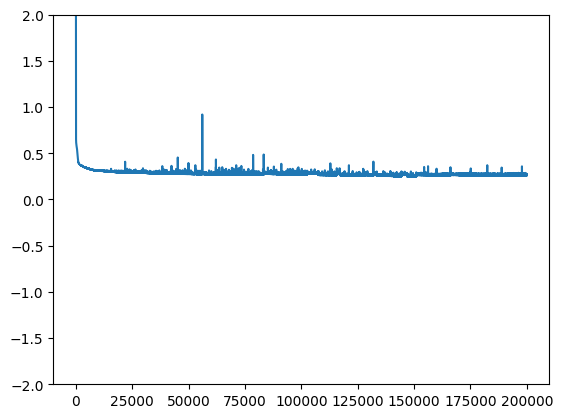

In [29]:
plt.ylim(-2,2)
plt.plot(nos, losses)

In [30]:
df_test =  pd.read_csv("/run/media/nuclea/Code/DataScience/PracticeNotebooks/titanic/titanic/test.csv")
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [31]:
df_test = data_processing(df_test)

In [34]:
df_test.isna().sum()

PassengerId     0
Pclass          0
Sex             0
Age             0
SibSp           0
Parch           0
Fare            0
Cabin_int       0
Embarked_int    0
dtype: int64

In [33]:
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].mean())

In [35]:
df_test.dtypes

PassengerId       int64
Pclass            int64
Sex               int64
Age             float64
SibSp             int64
Parch             int64
Fare            float64
Cabin_int         int64
Embarked_int      int64
dtype: object

In [36]:
X_test_np = df_test.to_numpy()
X_test = torch.tensor(X_test_np)

In [37]:
X_test

tensor([[8.9200e+02, 3.0000e+00, 1.0000e+00,  ..., 7.8292e+00, 7.6000e+01,
         1.0000e+00],
        [8.9300e+02, 3.0000e+00, 2.0000e+00,  ..., 7.0000e+00, 7.6000e+01,
         2.0000e+00],
        [8.9400e+02, 2.0000e+00, 1.0000e+00,  ..., 9.6875e+00, 7.6000e+01,
         1.0000e+00],
        ...,
        [1.3070e+03, 3.0000e+00, 1.0000e+00,  ..., 7.2500e+00, 7.6000e+01,
         2.0000e+00],
        [1.3080e+03, 3.0000e+00, 1.0000e+00,  ..., 8.0500e+00, 7.6000e+01,
         2.0000e+00],
        [1.3090e+03, 3.0000e+00, 1.0000e+00,  ..., 2.2358e+01, 7.6000e+01,
         0.0000e+00]], dtype=torch.float64)

In [42]:
model.eval()

X_test = X_test.to(torch.float64)

with torch.no_grad():
    y_pred_test = model(X_test).squeeze()  # Get the model's predictions

y_pred_test_rounded = torch.round(y_pred_test)  # Rounding sigmoid output to get class labels
y_pred_test_rounded

tensor([0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
        0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
        1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
        0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
        0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
        1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
        0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
        1., 0., 1., 0., 1., 0., 1., 0., 

In [48]:
output_df = pd.DataFrame(df_test['PassengerId'])
output_df['Survived'] = y_pred_test_rounded.int()

In [49]:
output_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,0


In [50]:
output_df.to_csv('predictions.csv', index=False)